### Problem Statement :
Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


###  Exploratory Data Analysis (EDA)

In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df = pd.get_dummies(df, drop_first=True)

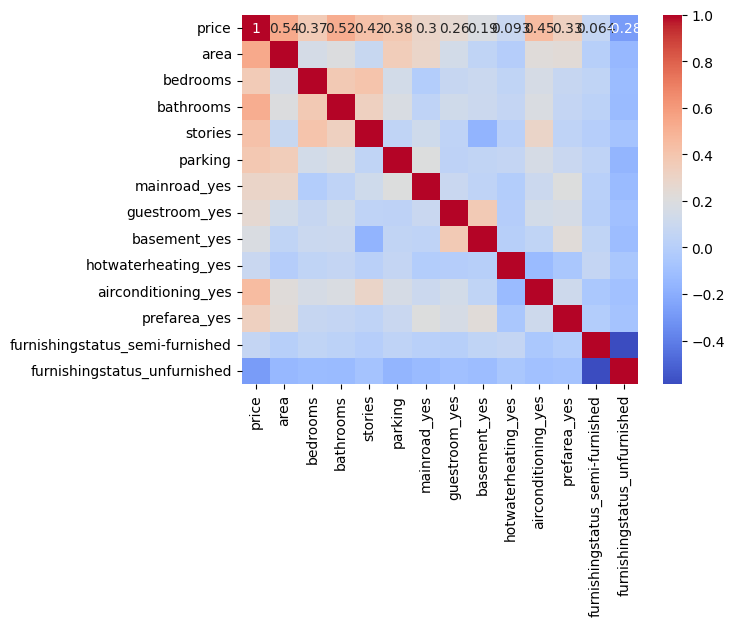

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Model Training and Evaluation

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2750040479309.0513
R^2 Score: 0.45592991188724474


### Prediction Example

In [14]:
sample = X_test.iloc[0]
actual_price = y_test.iloc[0]
predicted_price = model.predict([sample])[0]

# Print the actual and predicted prices
print('Sample Features:', sample.to_dict())
print('Actual Price:', actual_price)
print(f'Predicted Price: {predicted_price:.2f}') 

Sample Features: {'area': 5900, 'bedrooms': 4, 'bathrooms': 2}
Actual Price: 4060000
Predicted Price: 6383168.06


### Result Analysis

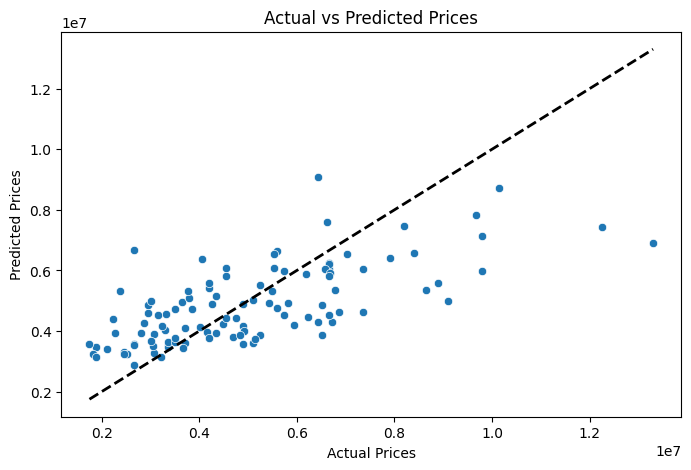

In [15]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

The model shows moderate performance with an R-squared value of about 0.46. 
This example shows that the model's prediction is in the same ballpark as the actual price, but there's still room for improvement. The prediction is off by about 57%, which aligns with our earlier R-squared value of 0.46. Adding more features or adopting more complex models could enhance the accuracy of predictions, particularly for houses at the higher end of the market.